In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
encoder = LabelEncoder()

In [2]:
heart = pd.read_csv("/content/heart.csv")

In [3]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
X=heart.drop('HeartDisease', axis=1)
y=heart['HeartDisease']

In [6]:
categorical_columns = heart[["Sex","ChestPainType","RestingECG", "ExerciseAngina", "ST_Slope"]]

In [7]:
# Check number of categories in each column
for column in categorical_columns.columns:
    print(f"Column: {column}")
    print(categorical_columns[column].value_counts())
    print()

Column: Sex
Sex
M    725
F    193
Name: count, dtype: int64

Column: ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Column: RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Column: ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Column: ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64



In [8]:
le_model = LabelEncoder()

X['Sex'] = le_model.fit_transform(X['Sex'])
X['ChestPainType'] = le_model.fit_transform(X['ChestPainType'])
X['RestingECG'] = le_model.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = le_model.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = le_model.fit_transform(X['ST_Slope'])

In [9]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [10]:
y.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [11]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

Epoch 1/100
26/26 [==============================] - 1s 15ms/step - loss: 0.6786 - accuracy: 0.5394 - val_loss: 0.6107 - val_accuracy: 0.7941
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 0.5675 - accuracy: 0.8116 - val_loss: 0.5168 - val_accuracy: 0.8235
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 0.4902 - accuracy: 0.8264 - val_loss: 0.4513 - val_accuracy: 0.8382
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 0.4395 - accuracy: 0.8300 - val_loss: 0.4155 - val_accuracy: 0.8431
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.4127 - accuracy: 0.8325 - val_loss: 0.4010 - val_accuracy: 0.8480
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3959 - accuracy: 0.8313 - val_loss: 0.3862 - val_accuracy: 0.8529
Epoch 7/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3868 - accuracy: 0.8350 - val_loss: 0.3794 - val_accuracy: 0.8578
Epoch 8/100


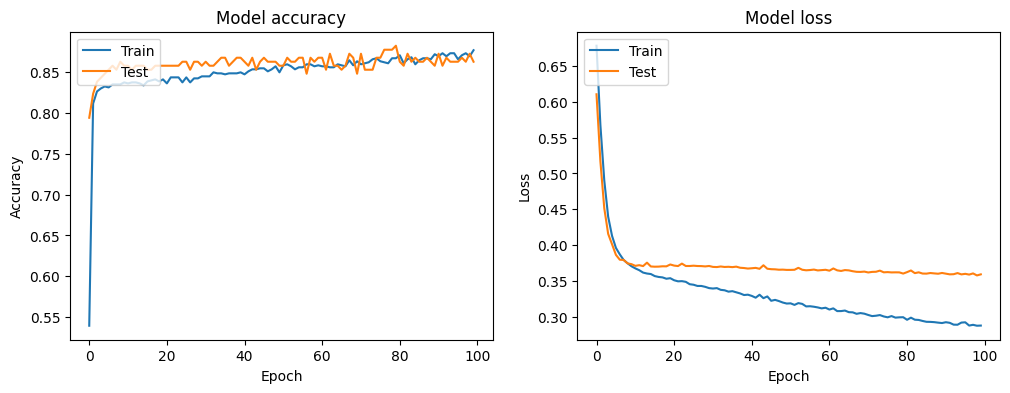

7/7 [==============================] - 0s 2ms/step


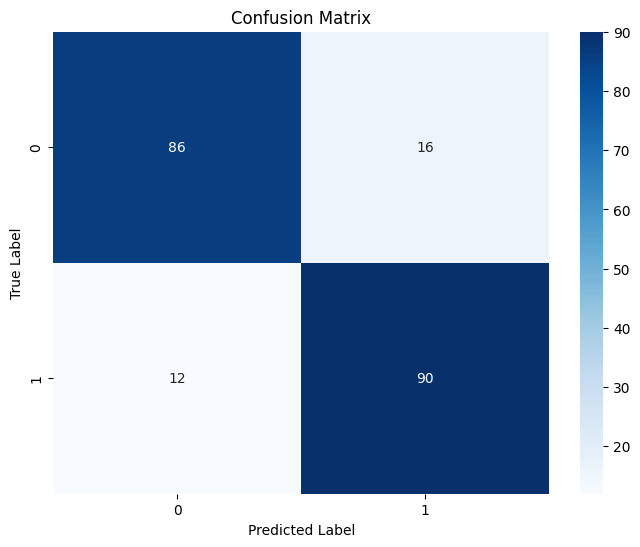

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model and store the history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predict the values from the test dataset
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [16]:
model.save("/content/Heart.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
